# 3. Update, Select, and Delete with MySQL

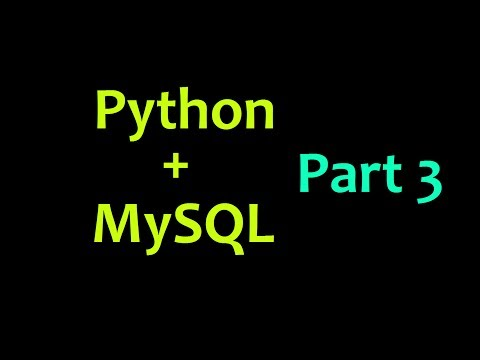

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('1iHtAj85vcs')

## 3.1 Basic MySQL commands (cont.)

Before the update and delete operations, the table "taula" is as below:

```mysql
mysql> SELECT * FROM taula;
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419969 | renwei   | Welcome to the tutorial!                                                                |
| 1385419970 | renwei   | wow thanks @tingting, you have completed me.                                            |
| 1385419971 | renwei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
+------------+----------+-----------------------------------------------------------------------------------------+
3 rows in set (0.00 sec)

```

### 3.1.1 Update

(1) Update the username.

```mysql
mysql> UPDATE taula SET username="RENWei" WHERE username="renwei";
Query OK, 3 rows affected (0.01 sec)
Rows matched: 3  Changed: 3  Warnings: 0
mysql> SELECT * FROM taula;
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419969 | RENWei   | Welcome to the tutorial!                                                                |
| 1385419970 | RENWei   | wow thanks @tingting, you have completed me.                                            |
| 1385419971 | RENWei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
+------------+----------+-----------------------------------------------------------------------------------------+
3 rows in set (0.00 sec)

```

(2) Update the username for a limited number of rows.

```mysql
mysql> UPDATE taula SET username="Wei Ren" WHERE username="RENWei" LIMIT 1;
Query OK, 1 row affected (0.01 sec)
Rows matched: 1  Changed: 1  Warnings: 0
mysql> SELECT * FROM taula;
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419969 | Wei Ren  | Welcome to the tutorial!                                                                |
| 1385419970 | RENWei   | wow thanks @tingting, you have completed me.                                            |
| 1385419971 | RENWei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
+------------+----------+-----------------------------------------------------------------------------------------+
3 rows in set (0.00 sec)

```

### 3.1.2 Delete

(1) Delete a limited number of qualified rows.

```mysql
mysql> DELETE FROM taula WHERE username="Wei Ren" LIMIT 1;
Query OK, 1 row affected (0.01 sec)
mysql> SELECT * FROM taula;
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419970 | RENWei   | wow thanks @tingting, you have completed me.                                            |
| 1385419971 | RENWei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
+------------+----------+-----------------------------------------------------------------------------------------+
2 rows in set (0.00 sec)
mysql> DELETE FROM taula WHERE username="renwei" LIMIT 1;
Query OK, 1 row affected (0.01 sec)
mysql> SELECT * FROM taula;
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419971 | RENWei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
+------------+----------+-----------------------------------------------------------------------------------------+
1 row in set (0.00 sec)

```

**Note that by default the string comparison in MySQL is case-insensitive.** To change it into case-sensitive, 

* Add "BINARY" right after "WHERE", e.g.,

```mysql
mysql> SELECT *  FROM `table` WHERE BINARY `column` = 'value'
```

* Declare the column as case-sensitive while creating the table, e.g.,

```mysql
my_field VARCHAR(255) CHARACTER SET binary
```

or 

```mysql
my_field TEXT CHARACTER SET binary
```

(2) Restore the deleted rows.

**Note that DELETE can't be undone, so always run SELECT to preview the to-be-deleted data before running DELETE.**

```mysql
mysql> INSERT INTO taula VALUES (1385419970, "renwei", "wow thanks @tingting, you have completed me.");
Query OK, 1 row affected (0.02 sec)
mysql> INSERT INTO taula VALUES (1385419969, "renwei", "Welcome to the tutorial!");
Query OK, 1 row affected (0.01 sec)
mysql> SELECT * FROM taula;
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419971 | RENWei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
| 1385419970 | renwei   | wow thanks @tingting, you have completed me.                                            |
| 1385419969 | renwei   | Welcome to the tutorial!                                                                |
+------------+----------+-----------------------------------------------------------------------------------------+
3 rows in set (0.01 sec)
mysql> SELECT * FROM taula WHERE username="renwei";
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419971 | RENWei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
| 1385419970 | renwei   | wow thanks @tingting, you have completed me.                                            |
| 1385419969 | renwei   | Welcome to the tutorial!                                                                |
+------------+----------+-----------------------------------------------------------------------------------------+
3 rows in set (0.00 sec)
mysql> SELECT * FROM taula WHERE BINARY username="renwei";
+------------+----------+----------------------------------------------+
| time       | username | tweet                                        |
+------------+----------+----------------------------------------------+
| 1385419970 | renwei   | wow thanks @tingting, you have completed me. |
| 1385419969 | renwei   | Welcome to the tutorial!                     |
+------------+----------+----------------------------------------------+
2 rows in set (0.00 sec)

```

(3) Insert one more row with a very small UNIX time stamp.

```mysql
mysql> INSERT INTO taula VALUES (13854, "renwei", "wow thanks @tingting, you have completed me.");
Query OK, 1 row affected (0.01 sec)
mysql> SELECT * FROM taula WHERE username="renwei";
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419971 | RENWei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
| 1385419970 | renwei   | wow thanks @tingting, you have completed me.                                            |
| 1385419969 | renwei   | Welcome to the tutorial!                                                                |
|      13854 | renwei   | wow thanks @tingting, you have completed me.                                            |
+------------+----------+-----------------------------------------------------------------------------------------+
4 rows in set (0.00 sec)
```

(4) Delete the rows within a specific range of the UNIX time stamp.

```mysql
mysql> SELECT * FROM taula WHERE time > 13854 AND time < 1385419970;
+------------+----------+--------------------------+
| time       | username | tweet                    |
+------------+----------+--------------------------+
| 1385419969 | renwei   | Welcome to the tutorial! |
+------------+----------+--------------------------+
1 row in set (0.00 sec)
mysql> DELETE FROM taula WHERE time > 13854 AND time < 1385419970;
Query OK, 1 row affected (0.01 sec)
mysql> SELECT * FROM taula;
+------------+----------+-----------------------------------------------------------------------------------------+
| time       | username | tweet                                                                                   |
+------------+----------+-----------------------------------------------------------------------------------------+
| 1385419971 | RENWei   | wow thanks @BillGates, thanks Bill for the job offer as VP, but I wanna keep opts open. |
| 1385419970 | renwei   | wow thanks @tingting, you have completed me.                                            |
|      13854 | renwei   | wow thanks @tingting, you have completed me.                                            |
+------------+----------+-----------------------------------------------------------------------------------------+
3 rows in set (0.00 sec)
```